__Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
 make a table containing R^2 value for each
prepared model.__

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np

In [18]:
df_startups = pd.read_csv('50_Startups.csv')
df_startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [19]:
df_startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [20]:
df_startups.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [21]:
#Creating dummy variable for 'State' column

df_startups2 = df_startups.copy()
df_startups2['State'] = df_startups2['State'].astype('category')
df_startups2 = pd.get_dummies(data=df_startups, columns=['State'])

#rename the Solar column
df_startups2 = df_startups2.rename({'R&D Spend': 'RnD_Spend'}, axis=1)
df_startups2 = df_startups2.rename({'Marketing Spend': 'Marketing_Spend'}, axis=1)
df_startups2 = df_startups2.rename({'State_New York': 'State_New_York'}, axis=1)

df_startups2.head()


,RnD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New_York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [22]:
df_startups2.corr()

,RnD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New_York
RnD_Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New_York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


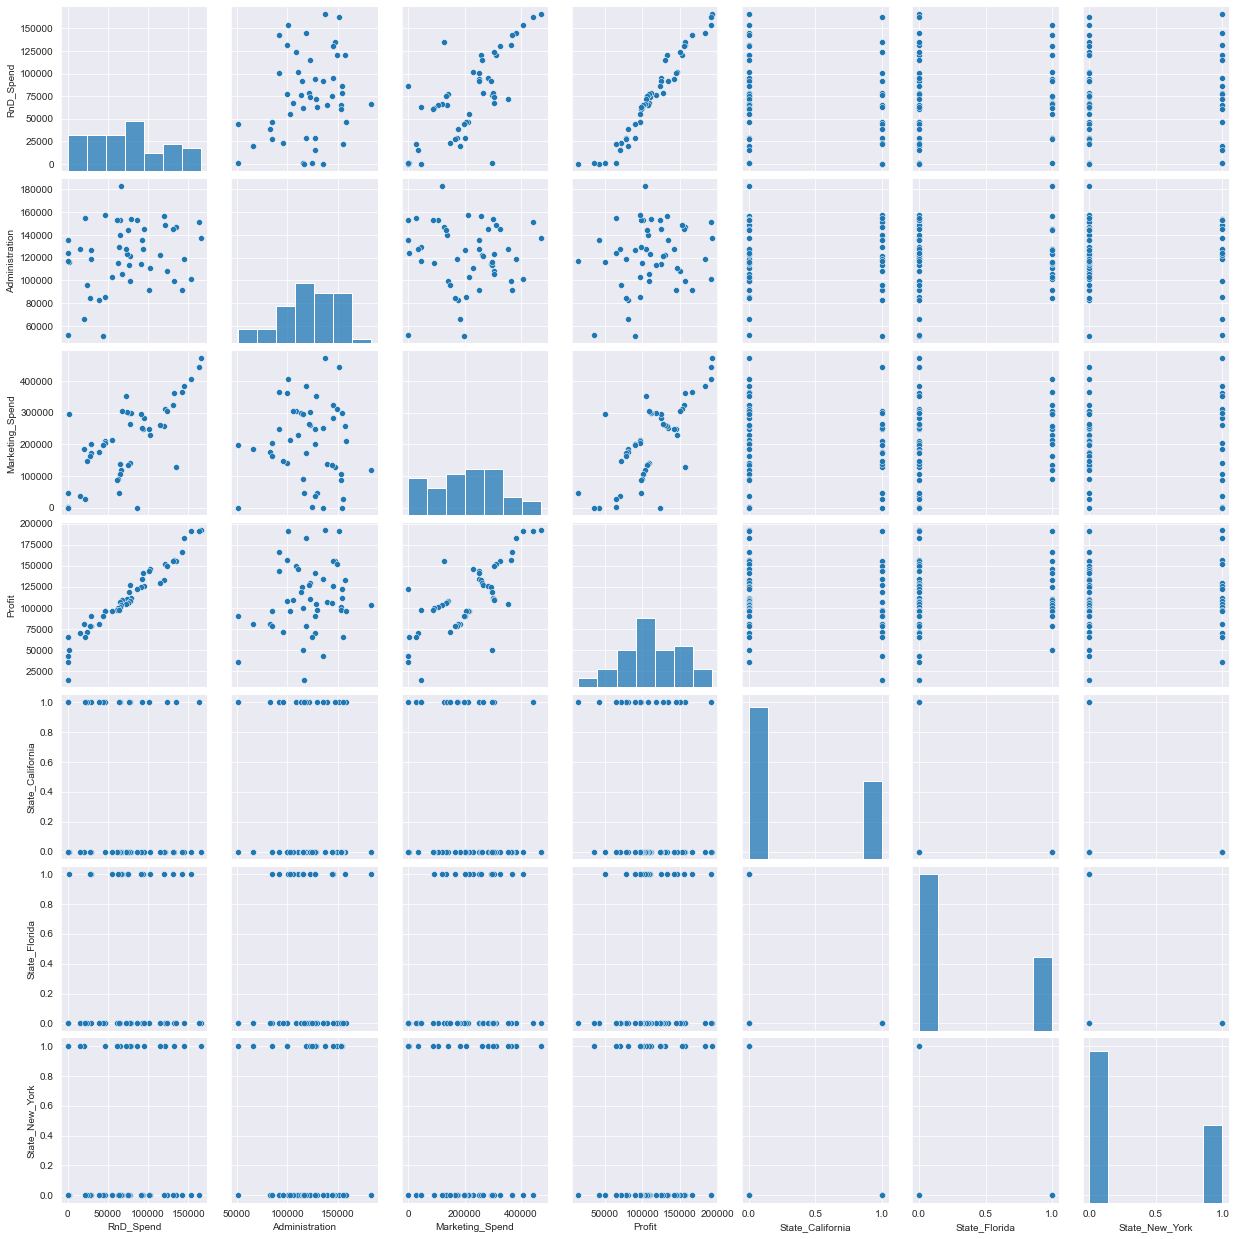

In [23]:
#Scatter plots for all the variables

sns.set_style(style='darkgrid')
sns.pairplot(df_startups2)

__State variable will be droped from prediction model, as it can be seen from correlation matrix it
is not correlated to response variable 'Profit'__

# Calculating VIF
##to verify multi collinearity does not exists, as from correlation matrix it shows no multicollineartity exists

In [24]:
rsq_rnd = smf.ols('RnD_Spend~Administration+Marketing_Spend',
                 data=df_startups2).fit().rsquared  
vif_rnd = 1/(1-rsq_rnd)

rsq_admin = smf.ols('Administration~RnD_Spend+Marketing_Spend',
                 data=df_startups2).fit().rsquared  
vif_admin = 1/(1-rsq_admin)

rsq_market = smf.ols('Marketing_Spend~Administration+RnD_Spend',
                  data=df_startups2).fit().rsquared  
vif_market = 1/(1-rsq_market)


# Storing vif values in a data frame
d1 = {'Variables':['RnD_Spend','Administration','Marketing_Spend'], 'VIF':[vif_rnd, vif_admin, vif_market],
      'R_Sq':[rsq_rnd, rsq_admin, rsq_market]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF,R_Sq
0,RnD_Spend,2.468903,0.594962
1,Administration,1.175091,0.149002
2,Marketing_Spend,2.326773,0.570220


__VIF values are very much less (<20), thus no multi collinearity problem exists__

# Preparing a model

In [25]:

model = smf.ols('Profit~RnD_Spend+Administration+Marketing_Spend',
                data = df_startups2).fit()

#corfficients
model.params

Intercept          50122.192990
RnD_Spend              0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [26]:
print('t-values: \n', np.round(model.tvalues, 5), '\n\np-values\n', np.round(model.pvalues,5))

t-values: 
 Intercept           7.62622
RnD_Spend          17.84637
Administration     -0.52551
Marketing_Spend     1.65508
dtype: float64 

p-values
 Intercept          0.00000
RnD_Spend          0.00000
Administration     0.60176
Marketing_Spend    0.10472
dtype: float64


In [27]:
# r-square values
print('r-square: ', np.round(model.rsquared, 5), '\nadj. r-square: ', np.round(model.rsquared_adj, 5),
      '\nAIC: ', np.round(model.aic,5))

r-square:  0.95075 
adj. r-square:  0.94753 
AIC:  1058.7715


__r-squared value of model is 0.95, is excellent for prediction, Variables 'Administration' and 'Marketing_Spend' has insignificant p values, verify it by its SLR and MLR model__

In [28]:
slr_admin = smf.ols("Profit~Administration", data=df_startups2).fit()
slr_market = smf.ols("Profit~Marketing_Spend", data=df_startups2).fit()
mlr_adminMkt = smf.ols("Profit~Administration+Marketing_Spend", data=df_startups2).fit()

print('slr_admin:\n\n', slr_admin.tvalues, '\n', slr_admin.pvalues,
      '\n\nslr_market:\n\n', slr_market.tvalues, '\n', slr_market.pvalues,
      '\n\nmlr_adminMkt:\n\n',  mlr_adminMkt.tvalues, '\n', mlr_adminMkt.pvalues)

slr_admin:

 Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64 

slr_market:

 Intercept          7.808356
Marketing_Spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64 

mlr_adminMkt:

 Intercept          1.142741
Administration     2.467779
Marketing_Spend    8.281039
dtype: float64 
 Intercept          2.589341e-01
Administration     1.729198e-02
Marketing_Spend    9.727245e-11
dtype: float64


# Computing VIF

In [29]:
rsq_RnD = smf.ols('RnD_Spend~Administration+Marketing_Spend', data=df_startups2).fit().rsquared  
vif_RnD = 1/(1-rsq_RnD)

rsq_Admin = smf.ols('Administration~RnD_Spend+Marketing_Spend', data=df_startups2).fit().rsquared  
vif_Admin = 1/(1-rsq_Admin)

rsq_Market = smf.ols('Marketing_Spend~Administration+RnD_Spend', data=df_startups2).fit().rsquared  
vif_Market = 1/(1-rsq_Market)

df_vif = {'Variables':['RnD_Spend','Administration','Marketing_Spend'],'VIF':[vif_RnD, vif_Admin, vif_Market]}
Vif_frame = pd.DataFrame(df_vif)
Vif_frame

,Variables,VIF
0,RnD_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


__As VIF values are much less than 20, we can say that there is no multicorrelation problem__

# Residual Plot for Homoscedasticity

In [30]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

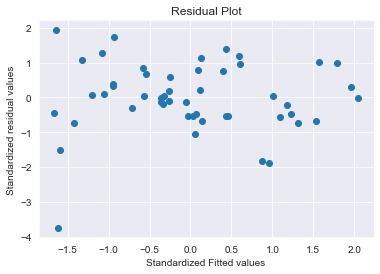

In [31]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

__Residual plot/Homoscedasticity shows, the Model is following the assumptions about the errors and we can
validate the model is reliable__

# Residual (Q-Q Plot)

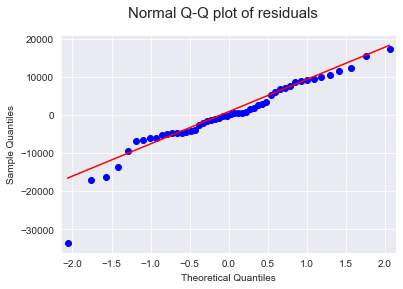

In [32]:
import statsmodels.api as sm

qqplot = sm.qqplot(model.resid,line='q')
plt.suptitle("Normal Q-Q plot of residuals", size=15)
plt.show()

__Test for Normality of Residuals (Q-Q Plot), errors are normaly distributed__

# Model Deletion Diagnostics
## identify outliers or influencers, using cooks distance

In [33]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

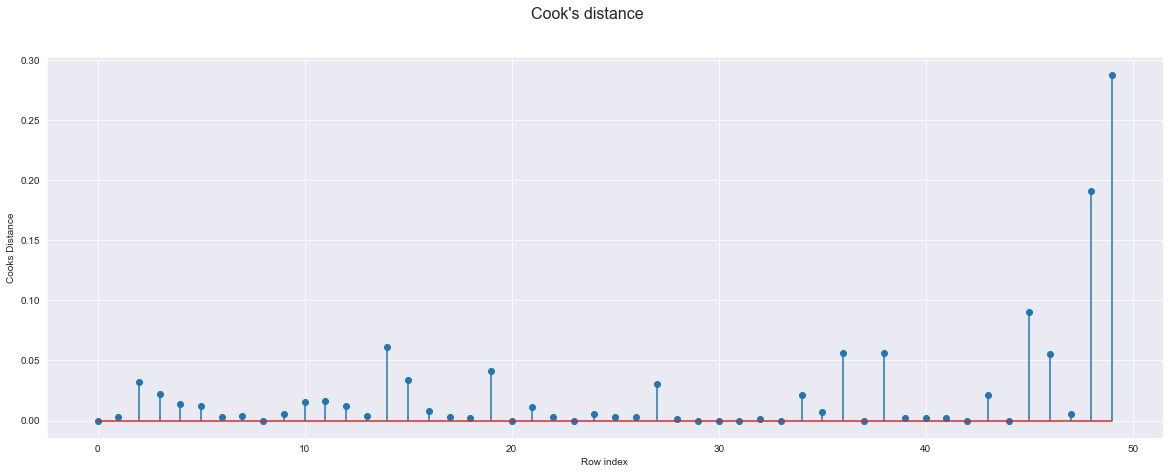

In [34]:
#Plot the influencers values using stem plot

fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df_startups2)), np.round(c, 3))
plt.suptitle('Cook\'s distance', size=16)
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [35]:
#identify index and value of influencer where c is more than 1
(np.argmax(c),np.max(c))

(49, 0.28808229275432623)

__highest cooks distance is 0.29, much less than 1, which suggests that no influencer or outlier exists,
we will verify it with leverage value/plot__ 

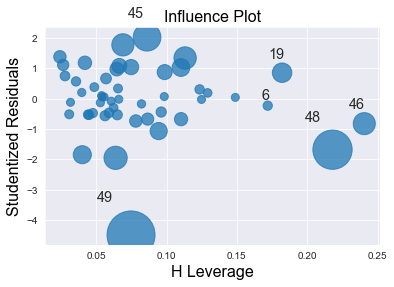

In [36]:
from statsmodels.graphics.regressionplots import influence_plot

influence_plot(model)
plt.show()

In [37]:
k = df_startups2.shape[1]
n = df_startups2.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.48

From the above plot and leverage_cutoff(0.48), it is evident that data no influencers exists

# Buid the Improved model

In [38]:
#Exclude variable "Administration" and generate R-Squared and AIC values

final_ml_mkt = smf.ols('Profit~RnD_Spend+Marketing_Spend',
                data = df_startups2).fit()
(final_ml_mkt.rsquared, final_ml_mkt.rsquared_adj, final_ml_mkt.aic)

(0.9504503015559763, 0.9483418037498477, 1057.070772191826)

In [39]:
#Exclude variable "Marketing_Spend" and generate R-Squared and AIC values

final_ml_admin = smf.ols('Profit~RnD_Spend+Administration',
                data = df_startups2).fit()
(final_ml_admin.rsquared, final_ml_admin.rsquared_adj, final_ml_admin.aic)

(0.9478129385009173, 0.9455922124796797, 1059.6636934567293)

In [40]:
#With all variables generate R-Squared and AIC values

final_ml_all = smf.ols('Profit~RnD_Spend+Marketing_Spend+Administration',
                data = df_startups2).fit()
(final_ml_all.rsquared, final_ml_all.rsquared_adj, final_ml_all.aic)

(0.9507459940683246, 0.9475337762901719, 1058.7714985998055)

In [41]:
df_models = pd.DataFrame( {'Model':['final_ml_mkt', 'final_ml_admin', 'final_ml_all'],
             'R squared':[final_ml_mkt.rsquared, final_ml_admin.rsquared, final_ml_all.rsquared],
             'Adj. R squared':[final_ml_mkt.rsquared_adj, final_ml_admin.rsquared_adj, final_ml_all.rsquared_adj],
             'AIC':[final_ml_mkt.aic, final_ml_admin.aic, final_ml_all.aic]} )

df_models

,Model,R squared,Adj. R squared,AIC
0,final_ml_mkt,0.950450,0.948342,1057.070772
1,final_ml_admin,0.947813,0.945592,1059.663693
2,final_ml_all,0.950746,0.947534,1058.771499


__We consider final model with all variables(final_ml_all), as very small increase in AIC and very small drop in 
adjusted r-squared value if we add variable'Administration', r-squared value is excellent which is 0.9507__